# Exploring what makes up the dataset


*   Number of users
*   Number of actions
*   Aspect Angles



From this analysis it has been decided to use User C for the final testing set.
User C does not provide a large proportion of the dataset like users A and B and contains an equal distribution of actions.

In [1]:
import os
if os.getcwd() == '/content':
    from google.colab import drive
    drive.mount('/content/gdrive')
    BASE_PATH = '/content/gdrive/My Drive/Level-4-Project/'
    !cd gdrive/My\ Drive/Level-4-Project/ && pip install --editable .
    os.chdir('gdrive/My Drive/Level-4-Project/')
    
elif os.getcwd() == 'D:\\Google Drive\\Level-4-Project\\notebooks\\data_processing' or os.getcwd() == 'D:\\Google Drive\\Level-4-Project\\src\\features':
    BASE_PATH = "D:/Google Drive/Level-4-Project/"
    
else:
    BASE_PATH = "/export/home/2192793m/Level-4-Project/"
    
DATA_PATH = BASE_PATH + 'data/'
RAW_PATH = DATA_PATH + 'raw/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Obtaining file:///content/gdrive/My%20Drive/Level-4-Project
  Running setup.py develop for src


In [0]:
from src.features import process_labels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df_labels = pd.read_csv(RAW_PATH + 'Labels.csv')
df_labels.rename(columns={'dataset ID':'dataset_id'}, inplace=True)
df_labels = process_labels.process_labels(df_labels)

## The Dataset

In [7]:
df_labels

,dataset_id,angle,person,movement,label,user_label,aspect_angle,on_place
0,1,0 deg,Aleksandar,Walking,walking,A,0,False
1,2,0 deg,Aleksandar,Walking,walking,A,0,False
2,3,30 deg,Aleksandar,Walking,walking,A,30,False
3,4,30 deg,Aleksandar,Walking,walking,A,30,False
4,5,60 deg,Aleksandar,Walking,walking,A,60,False
5,6,60 deg,Aleksandar,Walking,walking,A,60,False
6,7,0 deg,Aleksandar,"Moving arm faster towards radar, slower away",pushing,A,0,False
7,8,0 deg,Aleksandar,"Moving arm faster towards radar, slower away",pushing,A,0,False
8,9,30 deg,Aleksandar,"Moving arm faster towards radar, slower away",pushing,A,30,False
9,10,30 deg,Aleksandar,"Moving arm faster towards radar, slower away",pushing,A,30,False


## User

Text(0.5,1,'Number of Measurments per User')

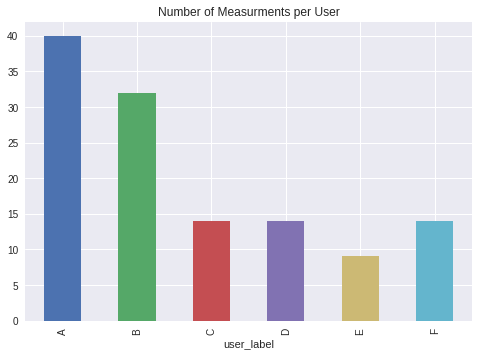

In [16]:
df_labels.groupby(['user_label'])['dataset_id'].count().plot(kind='bar')
plt.title("Number of Measurments per User")

## Action

Text(0.5,1,'Number of Measurments per Action')

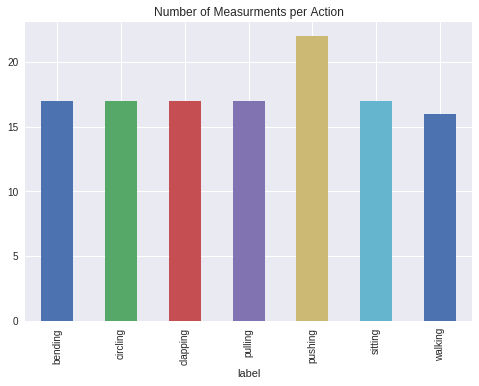

In [17]:
df_labels.groupby(['label'])['dataset_id'].count().plot(kind='bar')
plt.title("Number of Measurments per Action")

## Aspect Angle (Degrees)

Text(0.5,1,'Number of Measurments per Aspect Angle')

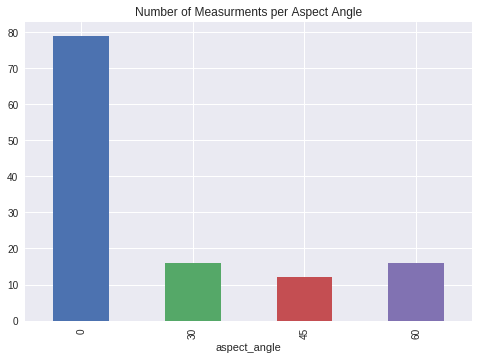

In [18]:
df_labels.groupby(['aspect_angle'])['dataset_id'].count().plot(kind='bar')
plt.title("Number of Measurments per Aspect Angle")

## User and Aspect Angle
It appears that users C, D, E and F only have data for zero degrees

Text(0.5,1,'Number of Measurments per User')

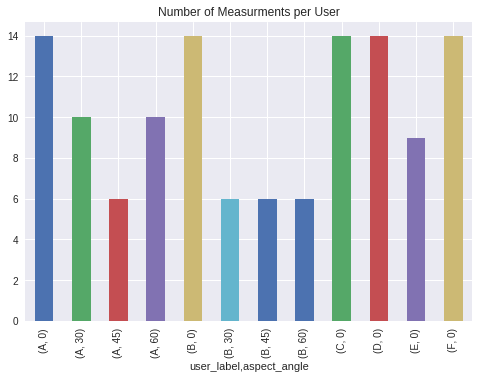

In [28]:
df_labels.groupby(['user_label', 'aspect_angle'])['dataset_id'].count().plot(kind='bar')
plt.title("Number of Measurments per User")

## User C 

In [0]:
user_c = df_labels.loc[df_labels["user_label"] == "C", :]

Text(0.5,1,'Action Distribution for User C')

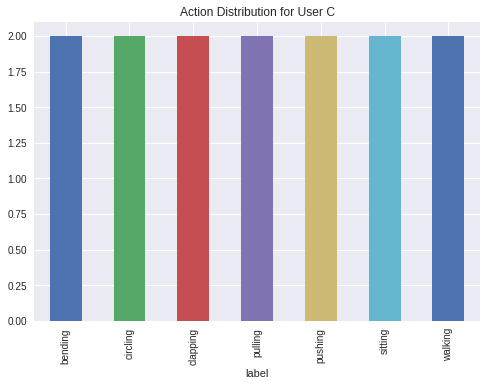

In [31]:
user_c.groupby(['label'])['dataset_id'].count().plot(kind='bar')
plt.title("Action Distribution for User C")